# Análise do CAR para o município de Rio Bonito do Iguaçú, PR, através de linguagem Python.

INPE 2019/I

Trabalho realizado para a disciplina Introdução à Programação para Sensoriamento Remoto 

Integrantes: Gabriel Chagas, Gabriela Simóes e Marcus Silveira 

In [1]:
# importando as bibliotecas
from osgeo import gdal, gdalconst, osr, ogr
#from pyproj import Proj, transform
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
from shapely.ops import cascaded_union
import pandas as pd
#import itertools

# Etapa 1 - Cálculo da área de vegetação nativa total (vegetação nativa do CAR + vegetação nativa da fundação)

In [2]:
os.chdir(r"C:\Users\Mark\Documents\PROGRAMAÇÃO SER\Trabalho Final\rio bonito\APP")
os.listdir()

['APP.dbf',
 'APP.prj',
 'APP.shp',
 'APP.shx',
 'APP.zip',
 'App_fund.cpg',
 'App_fund.dbf',
 'App_fund.shp',
 'App_fund.shx',
 'App_fund_clip.cpg',
 'App_fund_clip.dbf',
 'App_fund_clip.prj',
 'App_fund_clip.shp',
 'App_fund_clip.shx',
 'AREA_ALTITUDE_SUPERIOR_1800.dbf',
 'AREA_ALTITUDE_SUPERIOR_1800.zip',
 'AREA_CONSOLIDADA.dbf',
 'AREA_CONSOLIDADA.prj',
 'AREA_CONSOLIDADA.shp',
 'AREA_CONSOLIDADA.shx',
 'AREA_CONSOLIDADA.zip',
 'AREA_DECLIVIDADE_MAIOR_45.dbf',
 'AREA_DECLIVIDADE_MAIOR_45.prj',
 'AREA_DECLIVIDADE_MAIOR_45.shp',
 'AREA_DECLIVIDADE_MAIOR_45.shx',
 'AREA_DECLIVIDADE_MAIOR_45.zip',
 'AREA_IMOVEL.dbf',
 'AREA_IMOVEL.prj',
 'AREA_IMOVEL.shp',
 'AREA_IMOVEL.shx',
 'AREA_IMOVEL.zip',
 'AREA_POUSIO.dbf',
 'AREA_POUSIO.prj',
 'AREA_POUSIO.shp',
 'AREA_POUSIO.shx',
 'AREA_POUSIO.zip',
 'AREA_TOPO_MORRO.dbf',
 'AREA_TOPO_MORRO.prj',
 'AREA_TOPO_MORRO.shp',
 'AREA_TOPO_MORRO.shx',
 'AREA_TOPO_MORRO.zip',
 'BANHADO.dbf',
 'BANHADO.prj',
 'BANHADO.shp',
 'BANHADO.shx',
 'BANHADO.z

### Área do imóvel CAR

In [3]:
area_im = gpd.GeoDataFrame.from_file('AREA_IMOVEL.shp')
area_im_reproj = area_im.to_crs({'init' :'epsg:31982'})

In [4]:
#buffer
area_im_reproj['geometry'] = area_im_reproj.buffer(0.01)

In [5]:
#Obtendo o poligono da união dos imóveis pra ser usado como corte dos outros shapes
unionarea_im = area_im_reproj['geometry'].cascaded_union

In [6]:
#Transformando o polígono acima em geodataframe
unionarea_im_gdf = gpd.GeoDataFrame(gpd.GeoSeries(unionarea_im))
unionarea_im_gdf = unionarea_im_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')
unionarea_im_gdf.head()

,geometry
0,(POLYGON ((354809.0925403422 7173072.943614426...


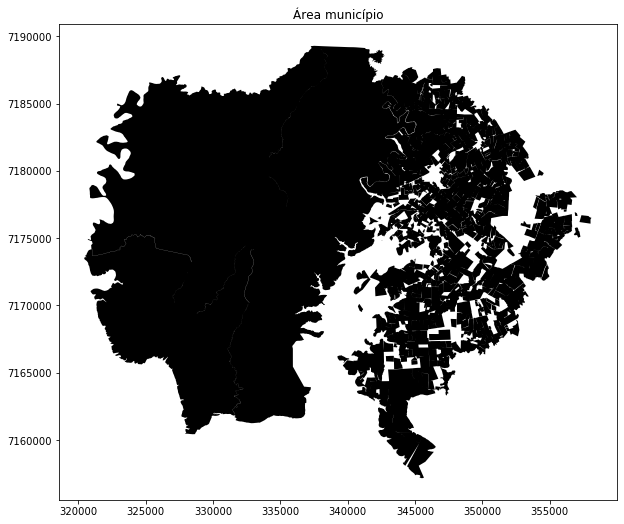

In [8]:
#Área usada para recorte
ax = unionarea_im_gdf.plot(cmap='gray',figsize=(10,15));
ax.set_title("Área município");

### Dados Fundação

In [7]:
#Fundação
#pegando as APP's de todos os municípios que abrangem nossa área
fund1 = gpd.GeoDataFrame.from_file('PR_4113304_APP.shp')
fund2 = gpd.GeoDataFrame.from_file('PR_4117057_APP.shp')
fund3 = gpd.GeoDataFrame.from_file('PR_4120150_APP.shp')
fund4 = gpd.GeoDataFrame.from_file('PR_4122156_APP.shp')
#pegando o uso do solo de todos os municípios:
uso1 = gpd.GeoDataFrame.from_file('PR_4113304_USO.shp')
uso2 = gpd.GeoDataFrame.from_file('PR_4117057_USO.shp')
uso3 = gpd.GeoDataFrame.from_file('PR_4120150_USO.shp')
uso4 = gpd.GeoDataFrame.from_file('PR_4122156_USO.shp')
#pegando os pontos das nascentes da fundação para todos os municípios:
nasc1 = gpd.GeoDataFrame.from_file('PR_4113304_NASCENTES.shp')
nasc2 = gpd.GeoDataFrame.from_file('PR_4117057_NASCENTES.shp')
nasc3 = gpd.GeoDataFrame.from_file('PR_4120150_NASCENTES.shp')
nasc4 = gpd.GeoDataFrame.from_file('PR_4122156_NASCENTES.shp')

In [8]:
#unindo APP's de todos os municípios no mesmo geodataframe
app_fund = gpd.GeoDataFrame(pd.concat([fund1, fund2, fund3, fund4]))

#unindo a vegetação nativa da fundação de todos os municípios no mesmo geodataframe
vg_fund = gpd.GeoDataFrame(pd.concat([uso1[3:5], uso2[3:5], uso3[3:5], uso4[3:5]]))

#unindo as nascentes de todos os municípios no mesmo geodataframe:
nasc_fund = gpd.GeoDataFrame(pd.concat([nasc1, nasc2, nasc3, nasc4]))

#Normalizando as projeções
nasc_fund.crs = {'init': 'epsg:31982'}
vg_fund.crs = {'init' :'epsg:31982'}

#Salvando em shape:
vg_fund.to_file('vg_fund.shp')
app_fund.to_file('App_fund.shp')
nasc_fund.to_file('nasc_fund.shp')

### Extração da Veg Nativa (Fundação)

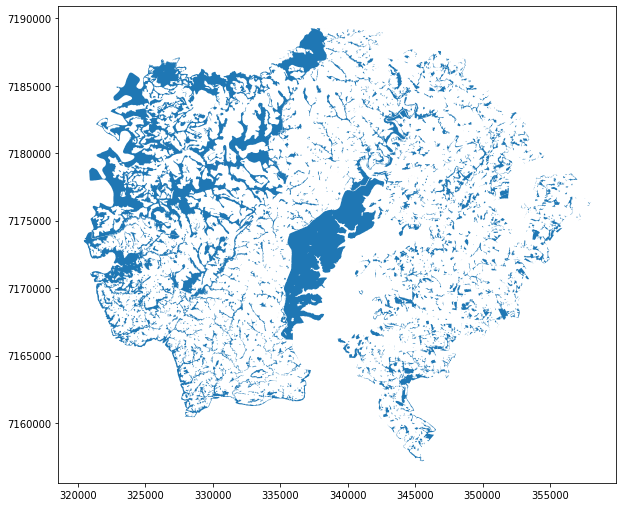

In [9]:
#Extraindo a veg nativa da fundação dentro da área dos imóveis
vgfund_clip = vg_fund['geometry'].intersection(unionarea_im)

vgfund_clip.plot(figsize=(10, 10))


In [10]:
#Transformando vgfund_clip em geodataframe para ser usada nas próximas análises
vgfund_clip_gdf = gpd.GeoDataFrame(gpd.GeoSeries(vgfund_clip))
vgfund_clip_gdf = vgfund_clip_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')

In [11]:
#Projetando e salvando vgfund_clip_gdf em shapefile
vgfund_clip_gdf.crs = {'init' :'epsg:31982'}
vgfund_clip_gdf.crs
vgfund_clip_gdf.to_file('vgfund_clip.shp')

### Importando a Vegetação Nativa CAR

In [12]:
# Import it to a GeoDataFrame using geopandas
#Vegetação nativa do Car
vg_features = gpd.GeoDataFrame.from_file('VEGETACAO_NATIVA.shp')
# Check the first 5 entries
vg_features.head()

,IDF,NOM_TEMA,NUM_AREA,geometry
0,142860,Remanescente de VegetaÃ§Ã£o Nativa,14.374268,(POLYGON ((-52.42962598673139 -25.512917320845...
1,149030,Remanescente de VegetaÃ§Ã£o Nativa,0.183619,POLYGON ((-52.52533435821533 -25.6074364958182...
2,867089,Remanescente de VegetaÃ§Ã£o Nativa,1.438618,POLYGON ((-52.55951623286653 -25.5325664863190...
3,369594,Remanescente de VegetaÃ§Ã£o Nativa,3.595064,POLYGON ((-52.54898281206754 -25.5151272596397...
4,369597,Remanescente de VegetaÃ§Ã£o Nativa,2.692197,POLYGON ((-52.54129333981932 -25.5148808491456...


In [13]:
print(vg_features.crs)

{'init': 'epsg:4674'}


In [14]:
#Mudar as coordenadas da vegetação do CAR
vg_features_reproj = vg_features.to_crs({'init' :'epsg:31982'})
print(vg_features_reproj.crs)

{'init': 'epsg:31982'}


In [15]:
vg_features_reproj.head()

,IDF,NOM_TEMA,NUM_AREA,geometry
0,142860,Remanescente de VegetaÃ§Ã£o Nativa,14.374268,(POLYGON ((356332.0760759369 7177483.569973778...
1,149030,Remanescente de VegetaÃ§Ã£o Nativa,0.183619,"POLYGON ((346832.9063588048 7166907.59158786, ..."
2,867089,Remanescente de VegetaÃ§Ã£o Nativa,1.438618,"POLYGON ((343302.541914277 7175160.470414957, ..."
3,369594,Remanescente de VegetaÃ§Ã£o Nativa,3.595064,"POLYGON ((344338.578587409 7177104.454909352, ..."
4,369597,Remanescente de VegetaÃ§Ã£o Nativa,2.692197,"POLYGON ((345111.1162218368 7177140.727690453,..."


In [16]:
#Fazer o buffer para evitar erros nos próximos procedimentos
vg_features_reproj['geometry'] = vg_features_reproj.buffer(0.01)

In [17]:
#Para deixar os polígonos em uma linha (vegetação nativa do CAR)
vg_features_new = vg_features_reproj.dissolve(by='NOM_TEMA', aggfunc='sum')

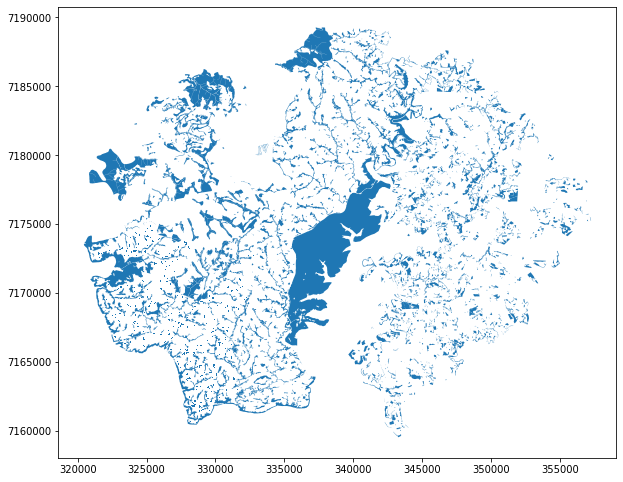

In [21]:
# Plotando a Veg Nativa CAR
vg_features_new.plot(figsize=(10, 10))


#### Veg Nativa Fundação - Processamento

In [18]:
vgfund_clip_gdf ['x'] = 1
vgfund_clip_gdf.head()

,geometry,x
3,"(POLYGON ((356564.0477999995 7178422.1926, 356...",1
4,(),1
3,(POLYGON ((327866.7766999998 7179833.682899999...,1
4,(),1
3,"(POLYGON ((349806.6559479096 7166301.10456567,...",1


In [19]:
#buffer
vgfund_clip_gdf['geometry'] = vgfund_clip_gdf.buffer(0.01)

In [20]:
#Para deixar os polígonos em uma linha (vegetação nativa da fundação)
vg_fund_total = vgfund_clip_gdf.dissolve(by='x', aggfunc='sum')

In [21]:
vg_fund_total

,geometry
x,
1,(POLYGON ((345427.3684822579 7157607.641004582...


### Unindo os dados de vegetação

In [22]:
#Para transformar o GeoDataFrame em lista
new_nat_CAR = [x for i, x in vg_features_new.iterrows()]

In [23]:
#Para transformar o GeoDataFrame em lista
new_nat_fund = [x for i, x in vg_fund_total.iterrows()]

In [24]:
#Para colocar todos os polígonos (geometry), de ambas as listas, em uma nova variável, deixando-as em uma única coluna e em uma única linha
new_veg_nat = [new_nat_CAR[0][0], new_nat_fund[0][0]]

In [25]:
#Para fazer a união dos polígonos, evitando, assim, a sobreposição
vg_nat = cascaded_union(new_veg_nat)

In [26]:
veg_nat_total = (vg_nat.area/10000)

In [27]:
print("Área total de Veg. nativa (ha): ", veg_nat_total)

Área total de Veg. nativa (ha):  20962.142164125315


In [28]:
#Para transformar em um GeoDataFrame
vg_nat_new = gpd.GeoDataFrame(gpd.GeoSeries(vg_nat))
#Segunda etapa para transformar para um GeoDataFrame, assim será possível plotar (mudar o nome da coluna)
vg_nat_new = vg_nat_new.rename(columns={0:'geometry'}).set_geometry('geometry')

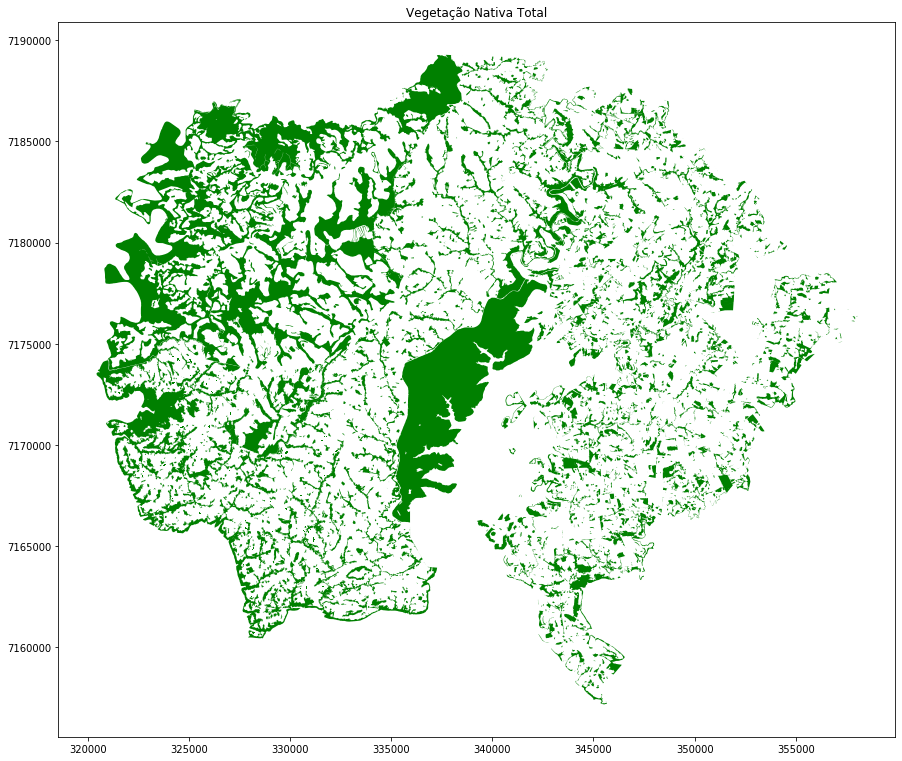

In [35]:
ax = vg_nat_new.plot(facecolor='green', figsize=(15,15));

ax.set_title("Vegetação Nativa Total");
#vg_nat_new.plot();

In [155]:
#Para salvar como um .shp
vg_total_nat = vg_nat_new.to_file("vg_nat_total.shp")

# Etapa 2 - Verificação de inconsistências nos dados CAR

### Verificando as regiões de sobreposição dos imóveis

In [84]:
#Procedimento para a verificação de sobeposição dos imóveis:
im_overlap = area_im_reproj['geometry'].boundary


In [85]:
im_overlap_union = area_im_reproj['geometry'].boundary.unary_union

In [86]:
#Área total dos imóveis (ha), com sopreposição inclusa:
area_im_overlap = sum(area_im_reproj['geometry'].area)
print("Área imóvel com sobreposição (ha): ",area_im_overlap/10000)

Área imóvel com sobreposição (ha):  64746.22842713059


In [87]:
#Área total que os imóveis abrangem
area_im_tot = sum(unionarea_im_gdf.area)
print("Área imóvel sem sobreposição (ha): ",area_im_tot/10000)

Área imóvel sem sobreposição (ha):  63594.305341084895


In [88]:
#Área total da sobreposição (ha):
sobr = area_im_overlap - (area_im_tot)
print("Área sobreposta(ha): ",sobr/10000)

Área sobreposta(ha):  1151.9230860456944


In [89]:
#Porcentagem acima do esperado:
print("Porcentagem sobreposição: ",(sobr/(area_im_tot))*100, "%")

Porcentagem sobreposição:  1.8113620077574746 %


In [90]:
#Representação das áreas que possuem sobreposição como linhas:
difference = im_overlap.geometry.difference(im_overlap_union)

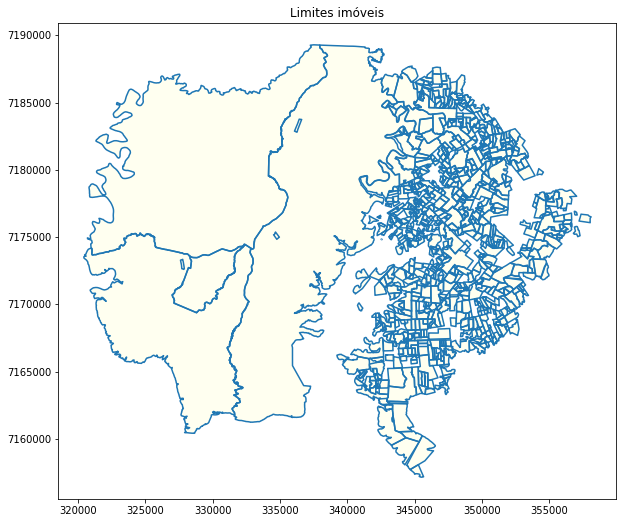

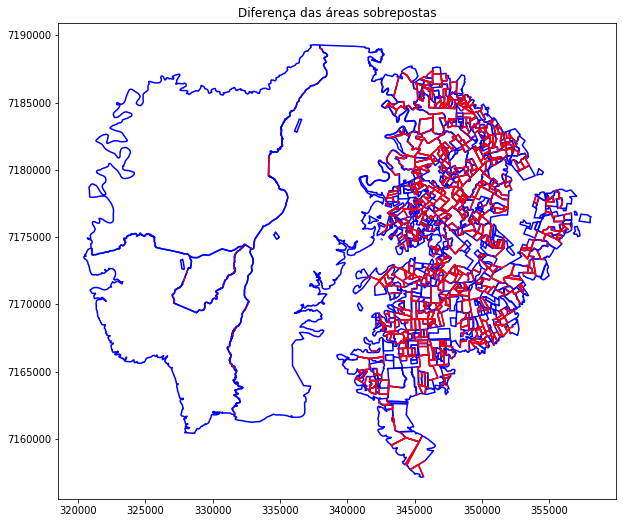

In [102]:
ax3 = im_overlap.plot(ax=unionarea_im_gdf.plot(color='ivory', figsize=(10, 10)));
#ax2 = im_overlap.plot(figsize=(10,15));
ax3.set_title("Limites imóveis");

ax2 = difference.plot(ax=im_overlap.plot(color='blue', figsize=(10, 10)), color='red');
#ax = difference.plot(figsize=(10,15));
ax2.set_title("Diferença das áreas sobrepostas");


### Verificação das nascentes 

In [24]:
#Extraindo as nascentes da fundação dentro da área dos imóveis
nasc_fund_clip = nasc_fund[nasc_fund['geometry'].within(unionarea_im)]

In [3]:
#Nascente CAR
nasc_car = gpd.GeoDataFrame.from_file('NASCENTE_OLHO_DAGUA.shp')
nasc_car_reproj = nasc_car.to_crs({'init' :'epsg:31982'})

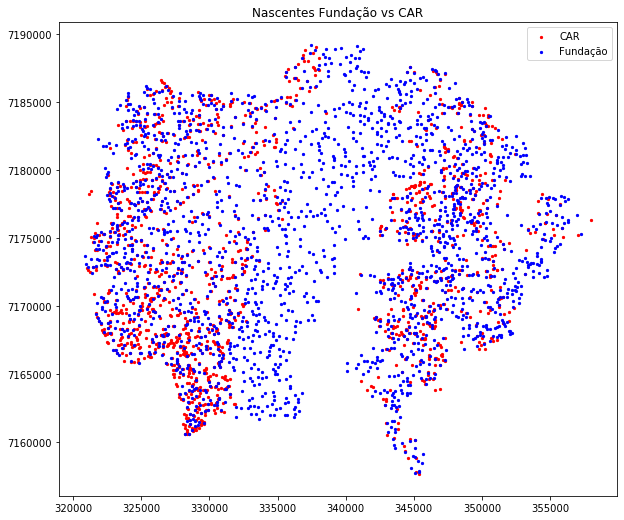

In [55]:
ay = nasc_fund_clip.plot(ax=nasc_car_reproj.plot(color='red', figsize=(10, 10), markersize=(5), label=u'CAR'), facecolor='Blue', markersize=(5), label ='Fundação');
ay.set_title("Nascentes Fundação vs CAR");
plt.legend(loc='best');

In [26]:
# Contabilizando o número de nascentes:
num_nasc_fund = len(nasc_fund_clip['geometry'])
num_nasc_car = len(nasc_car_reproj['geometry'])

#Número de nascentes da fundação:
print("Número nascente fundação: ",num_nasc_fund)

#Número de nascentes do CAR:
print("Número nascente CAR: ",num_nasc_car)

Número nascente fundação:  2042
Número nascente CAR:  1560


### Extração dos dados de App (Fundação)

In [29]:
#Extraindo as APP's da fundação dentro da área dos imóveis
App_fund_clip = app_fund['geometry'].intersection(unionarea_im)



In [30]:
#Transformando App_fund_clip em geodataframe para ser usada nas próximas análises
App_fund_clip_gdf = gpd.GeoDataFrame(gpd.GeoSeries(App_fund_clip))
App_fund_clip_gdf = App_fund_clip_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')

In [31]:
#Projetando e salvando App_fund_clip_gdf em shapefile
App_fund_clip_gdf.crs = {'init' :'epsg:31982'}
App_fund_clip_gdf.crs
App_fund_clip_gdf.to_file('App_fund_clip.shp')

In [32]:
App_fund_clip_gdf.crs

{'init': 'epsg:31982'}

### Importando dados App CAR

In [33]:
#Para saber os tipos de APP
App_car = gpd.GeoDataFrame.from_file('APP.shp')
App_car.head()

App_car_reproj = App_car.to_crs({'init' :'epsg:31982'})

lista = list(App_car_reproj['NOM_TEMA'])
lista

['Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios atÃ© 10 metros',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios atÃ© 10 metros',
 'Entorno de ReservatÃ³rio para Abastecimento ou GeraÃ§Ã£o de Energia',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios atÃ© 10 metros',
 "Ã\x81rea de PreservaÃ§Ã£o Permanente de Nascentes ou Olhos D'Ã¡gua Perenes",
 'APP segundo art. 61-A da Lei 12.651 de 2012',
 "Ã\x81rea de PreservaÃ§Ã£o Permanente de Nascentes ou Olhos D'Ã¡gua Perenes",
 'Ã\x81rea de PreservaÃ§Ã£o Permanente a Recompor de Rios atÃ© 10 metros',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Lagos e Lagoas Naturais',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente de ReservatÃ³rio artificial decorrente de barramento de cursos dâ\x80',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios atÃ© 10 metros',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios atÃ© 10 metros',
 'Ã\x81rea de PreservaÃ§Ã£o Permanente a Recompor de Rios atÃ© 10 metros',
 'APP segundo art. 61-A da Lei 12.651 de 2012',
 'Ã\x81rea de PreservaÃ§Ã

In [34]:
#Adicionar os tipos desejados
rio_10 = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios atÃ© 10 metros']
rio_man = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Manguezais']
rio_nas = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Nascentes ou Olhos D\'Ã¡gua Perenes']
rio_per = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Lagos e Lagoas Naturais']
rio_ban = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Banhado']
rio_res = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de ReservatÃ³rio artificial decorrente de barramento de cursos dâ\x80']
rio_10_50 = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios de 10 atÃ© 50 metros']
rio_200_500 = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios de 200 atÃ© 600 metros']
rio_50_200 = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Rios de 50 atÃ© 200 metros']
rio_ver = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Ã\x81rea de PreservaÃ§Ã£o Permanente de Veredas']
rio_ener = App_car_reproj[App_car_reproj['NOM_TEMA'] == 'Entorno de ReservatÃ³rio para Abastecimento ou GeraÃ§Ã£o de Energia']

In [35]:
#Para concatenar topos os GeoDataFrames (tipos) escolhidos
app_car_new = gpd.GeoDataFrame(pd.concat([rio_10, rio_man, rio_nas, rio_per, rio_ban, rio_res, rio_10_50, rio_200_500, rio_50_200, rio_ver, rio_ener]))

In [36]:
app_car_new.head()

,IDF,NOM_TEMA,NUM_AREA,geometry
0,20620,Ãrea de PreservaÃ§Ã£o Permanente de Rios atÃ©...,0.965031,(POLYGON ((351135.3540935131 7183117.271952329...
1,142860,Ãrea de PreservaÃ§Ã£o Permanente de Rios atÃ©...,5.225999,(POLYGON ((356145.5463807079 7178453.624835208...
3,149030,Ãrea de PreservaÃ§Ã£o Permanente de Rios atÃ©...,7.198648,(POLYGON ((346504.7865077914 7167356.076692535...
10,149067,Ãrea de PreservaÃ§Ã£o Permanente de Rios atÃ©...,14.096845,(POLYGON ((348325.5796501564 7175659.054311993...
11,369594,Ãrea de PreservaÃ§Ã£o Permanente de Rios atÃ©...,2.137681,(POLYGON ((344323.9251417449 7177403.346057591...


In [37]:
app_car_new['geometry'] = app_car_new.buffer(0.001)

In [38]:
#Para fazer a união de todos os polígonos
app_car_casc = cascaded_union(app_car_new['geometry'])

In [39]:
type(app_car_casc)

shapely.geometry.multipolygon.MultiPolygon

In [75]:
#1º passo para transformar a lista em GDF
app_car_casc_gdf = gpd.GeoDataFrame(gpd.GeoSeries(app_car_casc))

In [76]:
#2º passo para transformar a lista em GDF
app_car_casc_gdf = app_car_casc_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')

In [78]:
#Colocar a projeção no novo GDF
app_car_casc_gdf.crs = {'init' :'epsg:31982'}
app_car_casc_gdf = app_car_casc_gdf.to_crs({'init' :'epsg:31982'})

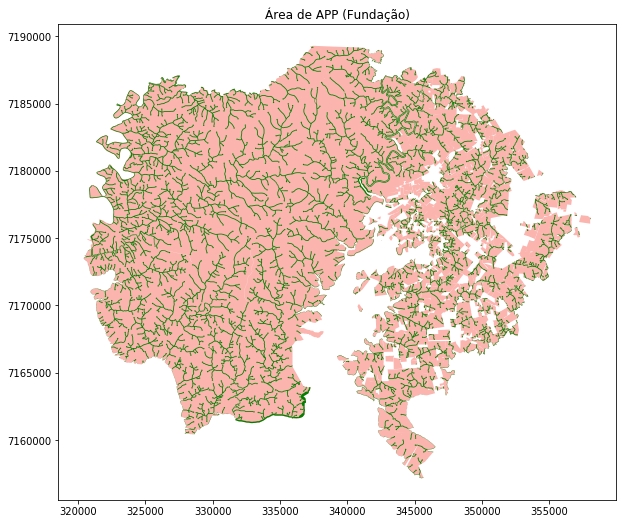

In [73]:
ay = App_fund_clip.plot(ax=unionarea_im_gdf.plot(cmap='Pastel1', figsize=(10, 10)), facecolor='green');
ay.set_title("Área de APP (Fundação)");



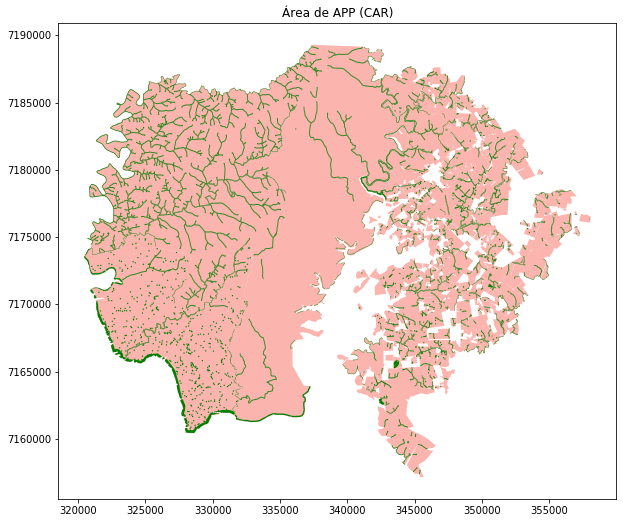

In [79]:
ay = app_car_casc_gdf.plot(ax=unionarea_im_gdf.plot(cmap='Pastel1', figsize=(10, 10)), facecolor='green');
ay.set_title("Área de APP (CAR)");


#### Diferença de área entre as APP's

In [81]:
print("Área APP fundação: ",sum(App_fund_clip_gdf.area/10000))
print("Área APP CAR: ",sum(app_car_casc_gdf.area/10000))

Área APP fundação:  9474.945168903967
Área APP CAR:  5456.487638085458


In [82]:
print('Diferença de área entre as APPs da fundação e do CAR:', sum(App_fund_clip_gdf.area/10000) - sum(app_car_casc_gdf.area/10000))

Diferença de área entre as APPs da fundação e do CAR: 4018.4575308185094


# Etapa 3 - Cálculo das áreas de APP, do CAR e da fundação, a serem recompostas, assim como da Reserva Legal 

In [43]:
#Função para fazer a diferença entre os polígonos do CAR e os polígonos da vegetação nativa total
debito_car = app_car_casc.difference(vg_nat)

In [110]:
debito_car_gdf = gpd.GeoDataFrame(gpd.GeoSeries(debito_car))
debito_car_gdf = debito_car_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')
debito_car_gdf.crs = {'init' :'epsg:31982'}
debito_car_projgdf = debito_car_gdf.to_crs({'init' :'epsg:31982'})

In [40]:
App_fund_clip_gdf['geometry'] = App_fund_clip_gdf.buffer(0.001)

In [41]:
#Função para fazer o intersection

debito_fund = App_fund_clip_gdf['geometry'].difference(vg_nat)


In [47]:
print('Débito do CAR em ha:',(debito_car.area)/10000)


Débito do CAR em ha: 1517.6188877273821


In [50]:
print('Débito da fundação em ha:', (sum(debito_fund.area)/10000))

Débito da fundação em ha: 3122.323421567878


In [52]:
print('Diferença entre o débito da fundação para o do CAR:',(sum(debito_fund.area)/10000) - ((debito_car.area)/10000))

Diferença entre o débito da fundação para o do CAR: 1604.704533840496


### Reserva Legal 

In [53]:
# Reserva legal CAR
Res_legal = gpd.GeoDataFrame.from_file('RESERVA_LEGAL.shp')
Res_legal.head()

,IDF,NOM_TEMA,NUM_AREA,geometry
0,20620,Reserva Legal Proposta,1.847480,(POLYGON ((-52.47838497161865 -25.464354415485...
1,142860,Reserva Legal Proposta,14.907881,(POLYGON ((-52.42410961269698 -25.506378705610...
2,149030,Reserva Legal Averbada,8.303572,(POLYGON ((-52.53155024547772 -25.605850228637...
3,149067,Reserva Legal Proposta,20.370975,(POLYGON ((-52.5105415460899 -25.5284704834466...
4,867089,Reserva Legal Proposta,1.438618,POLYGON ((-52.55951623286653 -25.5325664863190...


In [55]:
#Reprojetando 
Res_legal_reproj = Res_legal.to_crs({'init' :'epsg:31982'})

In [56]:
Res_legal_reproj.crs

{'init': 'epsg:31982'}

In [57]:
#Fazer o buffer para evitar erros nos próximos procedimentos
Res_legal_reproj['geometry'] = Res_legal_reproj.buffer(0.001)

In [58]:
#Função para unir todos os polígonos que se cruzam
res_legal_casc = Res_legal_reproj['geometry'].unary_union

In [59]:
#1º passo para transformar a lista em GDF
res_legal_casc_gdf = gpd.GeoDataFrame(gpd.GeoSeries(res_legal_casc))

In [60]:
#2º passo para transformar a lista em GDF
res_legal_casc_gdf = res_legal_casc_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')

In [62]:
res_legal_casc_gdf.crs = {'init' :'epsg:31982'}
res_legal_casc_gdf = res_legal_casc_gdf.to_crs({'init' :'epsg:31982'})

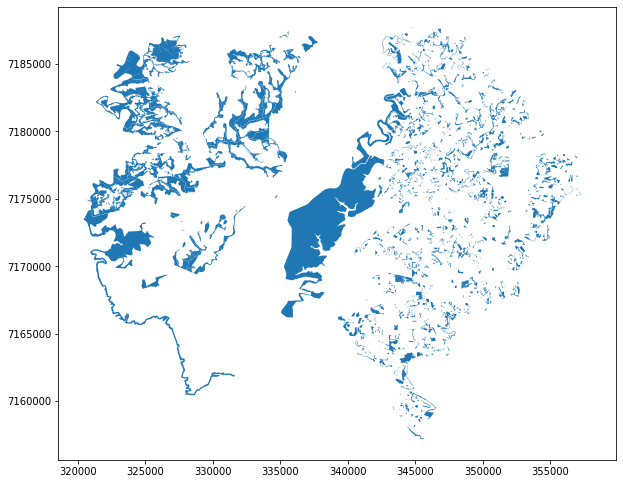

In [65]:
res_legal_casc_gdf.plot(figsize=(10,10))

In [67]:
#Soma da área de reserva legal do CAR (ha)
sum((res_legal_casc_gdf.area)/10000)

11624.025058475274

In [68]:
#Fazer o buffer para evitar erros nos próximos procedimentos
res_legal_casc_gdf['geometry'] = res_legal_casc_gdf.buffer(0.01)

In [69]:
#Função para fazer a diferença entre os polígonos da reserva legal e os polígonos da vegetação nativa total
res_legal_dif = res_legal_casc_gdf['geometry'].difference(vg_nat)

In [70]:
#Cálculo da área a ser recomposta
sum((res_legal_dif.area)/10000)

1075.249154531037

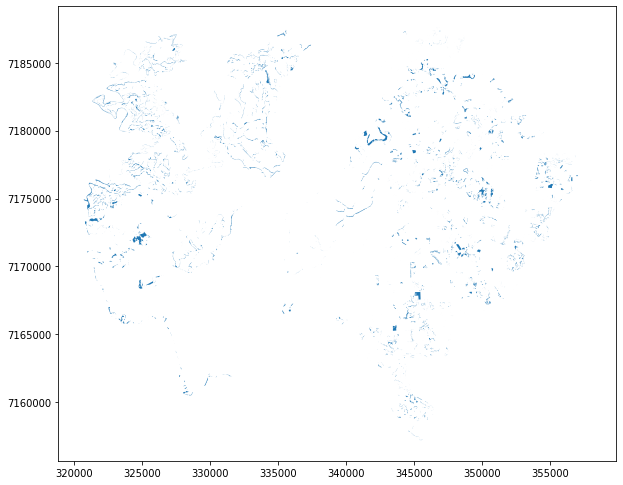

In [72]:
res_legal_dif.plot(figsize=(10,10))

## Visualização de cenários 

### Cenário atual 

% de cobertura florestal: 32.96229442509971


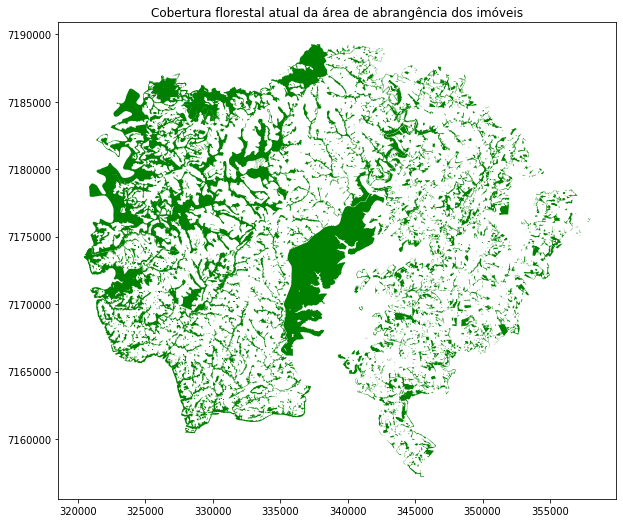

In [108]:
print(f'% de cobertura florestal: {((vg_nat.area)/unionarea_im.area)*100}')

ax2 = vg_nat_new.plot(figsize=(10, 10), color='green');
ax2.set_title("Cobertura florestal atual da área de abrangência dos imóveis");

### Cenário atual + áreas em débido das APPs da fundação

% de cobertura florestal: 37.87204759375444


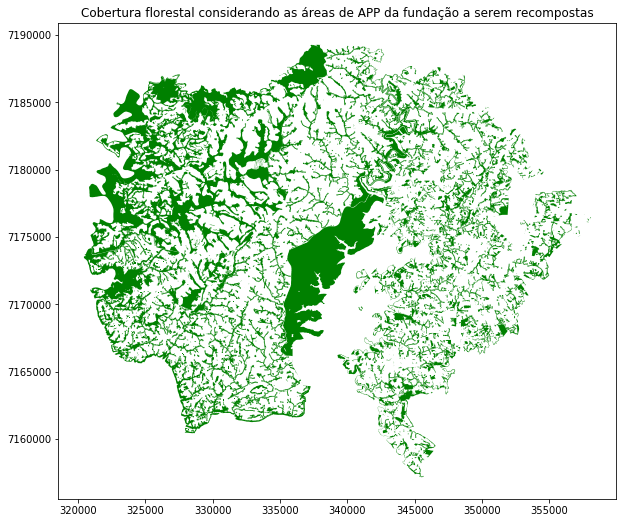

In [105]:
print(f'% de cobertura florestal: {(((vg_nat.area) + sum(debito_fund.area))/unionarea_im.area)*100}')

ax2 = vg_nat_new.plot(ax=debito_fund.plot(color='green', figsize=(10, 10)), color='green');
ax2.set_title("Cobertura florestal considerando as áreas de APP da fundação a serem recompostas");

### Cenário atual + áreas em débido das APPs do CAR

% de cobertura florestal: 35.3487013204777


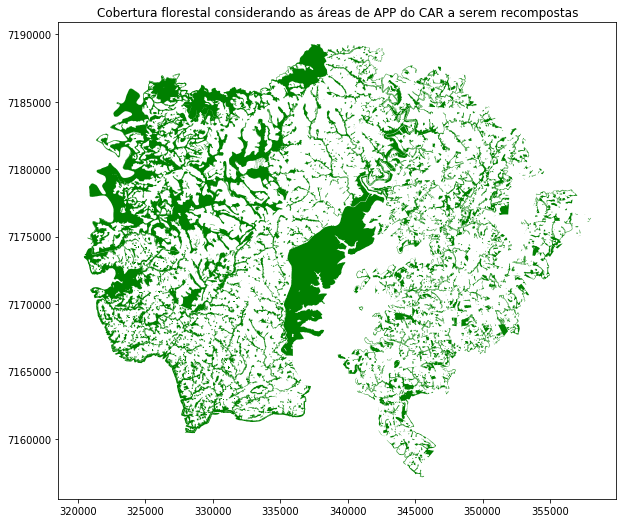

In [111]:
print(f'% de cobertura florestal: {(((vg_nat.area) + (debito_car.area))/unionarea_im.area)*100}')

ax2 = vg_nat_new.plot(ax=debito_car_projgdf.plot(color='green', figsize=(10, 10)), color='green');
ax2.set_title("Cobertura florestal considerando as áreas de APP do CAR a serem recompostas");